In [115]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from scipy import io
from scipy import stats
import pickle
import pandas as pd
import seaborn as sns


from load_pickle import get_outputs

load_folder='/Users/kendranoneman/Projects/mayo/NeuralDecoding/NNandDLinSci_project/results/'
fig_folder='/Users/kendranoneman/Projects/mayo/NeuralDecoding/NNandDLinSci_project/figures/' 

ill=0 #Whether I am making these plots for exporting to adobe illustrator (in which case I remove the text)
colors=['purple', 'blue','cyan','mediumaquamarine','green','yellowgreen','gold','orange', 'magenta', 'red','gray'] #Colors to plot each method

In [116]:
dirname = 's0-t0-d50-m0-o0-nm12-nf12-bn0-fo3-fi2/'
y_train_wf,y_test_wf,y_train_pred_wf,y_test_pred_wf,R2s_wf,rhos_wf,te_wf = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m1-o0-nm12-nf12-bn0-fo3-fi2/'
y_train_wc,y_test_wc,y_train_pred_wc,y_test_pred_wc,R2s_wc,rhos_wc,te_wc = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m5-o0-nm12-nf12-bn0-fo3-fi2/'
y_train_xgb,y_test_xgb,y_train_pred_xgb,y_test_pred_xgb,R2s_xgb,rhos_xgb,te_xgb = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m3-o0-nm12-nf12-bn0-fo3-fi2/'
y_train_svr,y_test_svr,y_train_pred_svr,y_test_pred_svr,R2s_svr,rhos_svr,te_svr = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m4-o0-nm12-nf12-bn0-fo3-fi2/'
y_train_dnn,y_test_dnn,y_train_pred_dnn,y_test_pred_dnn,R2s_dnn,rhos_dnn,te_dnn = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m5-o0-nm12-nf12-bn0-fo3-fi2/'
y_train_rnn,y_test_rnn,y_train_pred_rnn,y_test_pred_rnn,R2s_rnn,rhos_rnn,te_rnn = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m6-o0-nm12-nf12-bn0-fo3-fi2/'
y_train_gru,y_test_gru,y_train_pred_gru,y_test_pred_gru,R2s_gru,rhos_gru,te_gru = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m7-o0-nm12-nf12-bn0-fo3-fi2/'
y_train_lstm,y_test_lstm,y_train_pred_lstm,y_test_pred_lstm,R2s_lstm,rhos_lstm,te_lstm = get_outputs(dirname,load_folder)


R2s_all = np.hstack((R2s_wf,R2s_wc,R2s_xgb,R2s_svr,R2s_dnn,R2s_rnn,R2s_gru,R2s_lstm))
rhos_all = np.hstack((rhos_wf,rhos_wc,rhos_xgb,rhos_svr,rhos_dnn,rhos_rnn,rhos_gru,rhos_lstm))
times_all = np.hstack((te_wf,te_wc,te_xgb,te_svr,te_dnn,te_rnn,te_gru,te_lstm))
        
df_r2 = pd.DataFrame(R2s_all, columns = ['wf','wc','xgb','svr','dnn','rnn','gru','lstm'])
df_rho = pd.DataFrame(rhos_all, columns = ['wf','wc','xgb','svr','dnn','rnn','gru','lstm'])
df_te = pd.DataFrame(times_all, columns = ['wf','wc','xgb','svr','dnn','rnn','gru','lstm'])
print(df_r2)
print(df_rho)
print(df_te)

print("\n")
print(df_r2.loc[:, 'wf'].mean())

         wf        wc       xgb       svr       dnn       rnn       gru   
0  0.289150  0.373809  0.472053  0.375918  0.626423  0.472053  0.712059  \
1  0.463723  0.465270  0.539856  0.603253  0.643509  0.539856  0.757286   
2  0.367595  0.377523  0.694113  0.465442  0.612785  0.694113  0.666005   

       lstm  
0  0.650290  
1  0.751792  
2  0.526093  
         wf        wc       xgb       svr       dnn       rnn       gru   
0  0.543007  0.621816  0.718325  0.626097  0.795548  0.718325  0.848154  \
1  0.680394  0.682667  0.788819  0.781815  0.803529  0.788819  0.870799   
2  0.609086  0.629349  0.849962  0.706929  0.788450  0.849962  0.824401   

       lstm  
0  0.817746  
1  0.877616  
2  0.727728  
         wf         wc          xgb          svr         dnn          rnn   
0  1.431567  32.214043  1122.713601  1794.708310  436.990116  1122.713601  \
1  1.493404  32.031353   832.968864  1758.060016  275.816388   832.968864   
2  1.442581  32.437664   890.062677  1682.761920  341.9

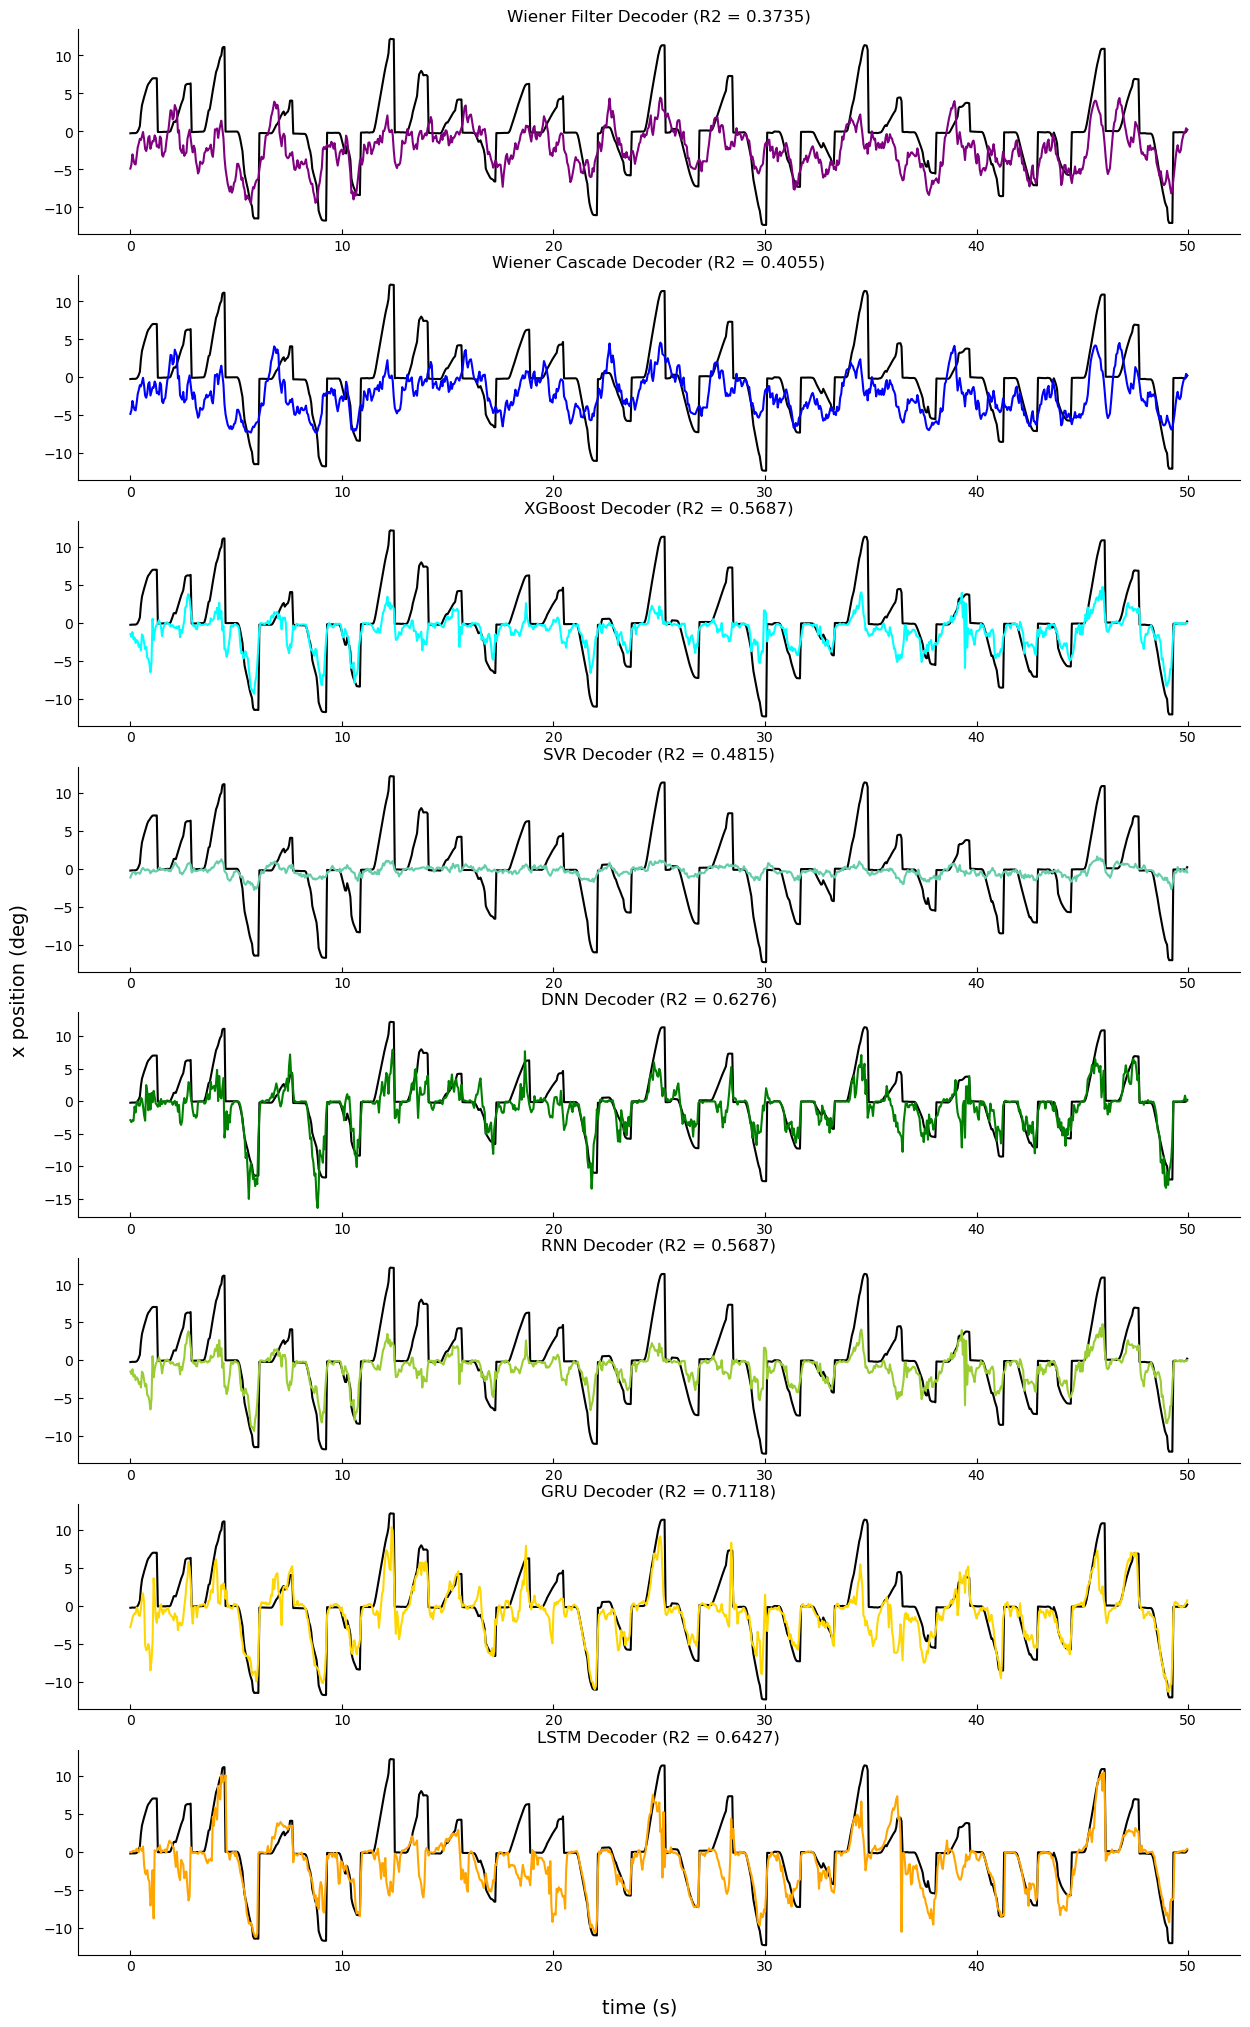

In [127]:
ts=np.arange(0,1000) #Plot samples 500-800

fig_traces, ax = plt.subplots(8,1,figsize=(15,25)) #Create figure (11 rows by 3 columns)

m=0 #Initialize method number. This corresponds to the row we're currently plotting in.
x = (ts*50)/1000

#WF
ax[m].plot(x,y_test_wf[0][0][0][ts,0],'k') #Plot actual
ax[m].plot(x,y_test_pred_wf[0][0][ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('Wiener Filter Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'wf'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

#WC
ax[m].plot(x,y_test_wc[0][0][0][ts,0],'k') #Plot actual
ax[m].plot(x,y_test_pred_wc[0][0][ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('Wiener Cascade Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'wc'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

#XGB
ax[m].plot(x,y_test_xgb[0][0][0][ts,0],'k') #Plot actual
ax[m].plot(x,y_test_pred_xgb[0][ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('XGBoost Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'xgb'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row


#SVR
ax[m].plot(x,y_test_svr[0][0][0][ts,0],'k') #Plot actual
ax[m].plot(x,y_test_pred_svr[0][ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('SVR Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'svr'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row


#DNN
ax[m].plot(x,y_test_dnn[0][0][0][ts,0],'k') #Plot actual
ax[m].plot(x,y_test_pred_dnn[0][ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('DNN Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'dnn'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

#RNN
ax[m].plot(x,y_test_rnn[0][0][0][ts,0],'k') #Plot actual
ax[m].plot(x,y_test_pred_rnn[0][ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('RNN Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'rnn'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

#GRU
ax[m].plot(x,y_test_gru[0][0][0][ts,0],'k') #Plot actual
ax[m].plot(x,y_test_pred_gru[0][ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('GRU Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'gru'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

#LSTM
ax[m].plot(x,y_test_lstm[0][0][0][ts,0],'k') #Plot actual
ax[m].plot(x,y_test_pred_lstm[0][ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('LSTM Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'lstm'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row



fig_traces.supxlabel('time (s)',y=0.085, fontsize=14)
fig_traces.supylabel('x position (deg)',x=0.08, fontsize=14)

fig_traces.savefig(fig_folder+'HEpos_traces.png', dpi=300)

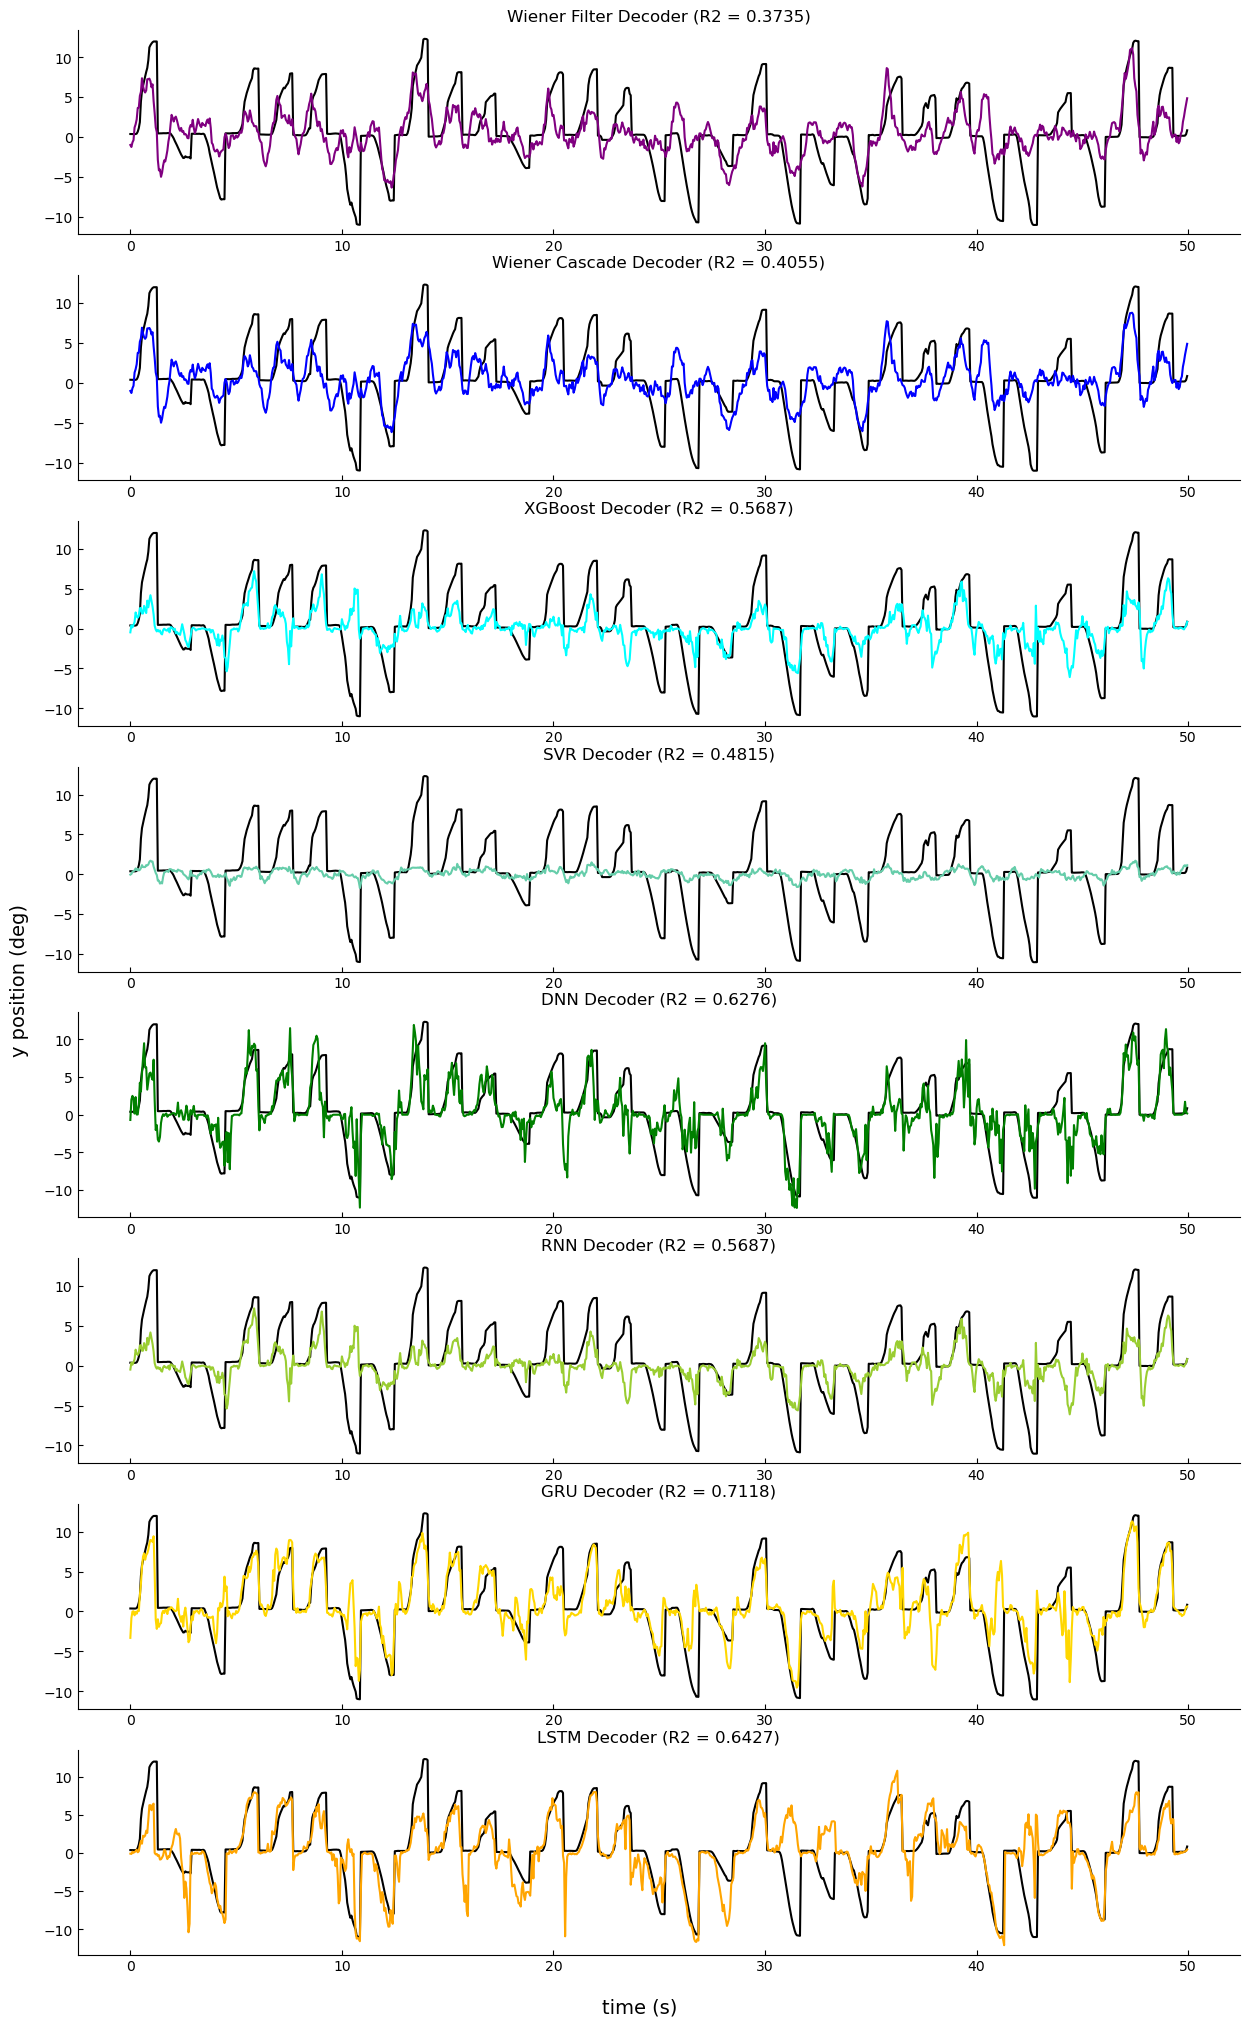

In [128]:
ts=np.arange(0,1000) #Plot samples 500-800

fig_traces, ax = plt.subplots(8,1,figsize=(15,25)) #Create figure (11 rows by 3 columns)

m=0 #Initialize method number. This corresponds to the row we're currently plotting in.
x = (ts*50)/1000

#WF
ax[m].plot(x,y_test_wf[0][0][0][ts,1],'k') #Plot actual
ax[m].plot(x,y_test_pred_wf[0][0][ts,1],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('Wiener Filter Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'wf'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

#WC
ax[m].plot(x,y_test_wc[0][0][0][ts,1],'k') #Plot actual
ax[m].plot(x,y_test_pred_wc[0][0][ts,1],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('Wiener Cascade Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'wc'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

#XGB
ax[m].plot(x,y_test_xgb[0][0][0][ts,1],'k') #Plot actual
ax[m].plot(x,y_test_pred_xgb[0][ts,1],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('XGBoost Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'xgb'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row


#SVR
ax[m].plot(x,y_test_svr[0][0][0][ts,1],'k') #Plot actual
ax[m].plot(x,y_test_pred_svr[0][ts,1],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('SVR Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'svr'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row


#DNN
ax[m].plot(x,y_test_dnn[0][0][0][ts,1],'k') #Plot actual
ax[m].plot(x,y_test_pred_dnn[0][ts,1],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('DNN Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'dnn'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

#RNN
ax[m].plot(x,y_test_rnn[0][0][0][ts,1],'k') #Plot actual
ax[m].plot(x,y_test_pred_rnn[0][ts,1],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('RNN Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'rnn'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

#GRU
ax[m].plot(x,y_test_gru[0][0][0][ts,1],'k') #Plot actual
ax[m].plot(x,y_test_pred_gru[0][ts,1],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('GRU Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'gru'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

#LSTM
ax[m].plot(x,y_test_lstm[0][0][0][ts,1],'k') #Plot actual
ax[m].plot(x,y_test_pred_lstm[0][ts,1],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('LSTM Decoder (R2 = {:.4f})'.format(df_r2.loc[:, 'lstm'].mean()))
#Set y limit and ticks
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))

#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
#If plotting for illustrator, remove text
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row


fig_traces.supxlabel('time (s)',y=0.085, fontsize=14)
fig_traces.supylabel('y position (deg)',x=0.08, fontsize=14)

fig_traces.savefig(fig_folder+'VEpos_traces.png', dpi=300)

In [119]:
######## FEF and MT ############
dirname = 's0-t0-d50-m0-o0-nm12-nf12-bn0-fo3-fi2/'
y_train_wf,y_test_wf,y_train_pred_wf,y_test_pred_wf,R2s_wf,rhos_wf,te_wf = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m1-o0-nm12-nf12-bn0-fo3-fi2/'
y_train_wc,y_test_wc,y_train_pred_wc,y_test_pred_wc,R2s_wc,rhos_wc,te_wc = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m5-o0-nm12-nf12-bn0-fo3-fi2/'
y_train_xgb,y_test_xgb,y_train_pred_xgb,y_test_pred_xgb,R2s_xgb,rhos_xgb,te_xgb = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m3-o0-nm12-nf12-bn0-fo3-fi2/'
y_train_svr,y_test_svr,y_train_pred_svr,y_test_pred_svr,R2s_svr,rhos_svr,te_svr = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m4-o0-nm12-nf12-bn0-fo3-fi2/'
y_train_dnn,y_test_dnn,y_train_pred_dnn,y_test_pred_dnn,R2s_dnn,rhos_dnn,te_dnn = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m5-o0-nm12-nf12-bn0-fo3-fi2/'
y_train_rnn,y_test_rnn,y_train_pred_rnn,y_test_pred_rnn,R2s_rnn,rhos_rnn,te_rnn = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m6-o0-nm12-nf12-bn0-fo3-fi2/'
y_train_gru,y_test_gru,y_train_pred_gru,y_test_pred_gru,R2s_gru,rhos_gru,te_gru = get_outputs(dirname,load_folder)

#dirname = 's0-t0-d50-m7-o0-nm12-nf12-bn0-fo3-fi2/'
#y_train_lstm,y_test_lstm,y_train_pred_lstm,y_test_pred_lstm,R2s_lstm,rhos_lstm,te_lstm = get_outputs(dirname,load_folder)


R2s_all = np.hstack((R2s_wf,R2s_wc,R2s_xgb,R2s_svr,R2s_dnn,R2s_rnn,R2s_gru))#,R2s_lstm))
rhos_all = np.hstack((rhos_wf,rhos_wc,rhos_xgb,rhos_svr,rhos_dnn,rhos_rnn,rhos_gru))#,rhos_lstm))
times_all = np.hstack((te_wf,te_wc,te_xgb,te_svr,te_dnn,te_rnn,te_gru))#,te_lstm))
        
df_r2_fefmt = pd.DataFrame(R2s_all, columns = ['wf','wc','xgb','svr','dnn','rnn','gru'])#,'lstm'])
df_rho_fefmt = pd.DataFrame(rhos_all, columns = ['wf','wc','xgb','svr','dnn','rnn','gru'])#,'lstm'])
df_te_fefmt = pd.DataFrame(times_all, columns = ['wf','wc','xgb','svr','dnn','rnn','gru'])#,'lstm'])
print(df_r2_fefmt)
print(df_rho_fefmt)
print(df_te_fefmt)

print("\n")
print(df_r2_fefmt.loc[:, 'wf'].mean())

############ FEF only ############
dirname = 's0-t0-d50-m0-o0-nm0-nf24-bn0-fo3-fi2/'
y_train_wf,y_test_wf,y_train_pred_wf,y_test_pred_wf,R2s_wf,rhos_wf,te_wf = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m1-o0-nm0-nf24-bn0-fo3-fi2/'
y_train_wc,y_test_wc,y_train_pred_wc,y_test_pred_wc,R2s_wc,rhos_wc,te_wc = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m5-o0-nm0-nf24-bn0-fo3-fi2/'
y_train_xgb,y_test_xgb,y_train_pred_xgb,y_test_pred_xgb,R2s_xgb,rhos_xgb,te_xgb = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m3-o0-nm0-nf24-bn0-fo3-fi2/'
y_train_svr,y_test_svr,y_train_pred_svr,y_test_pred_svr,R2s_svr,rhos_svr,te_svr = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m4-o0-nm0-nf24-bn0-fo3-fi2/'
y_train_dnn,y_test_dnn,y_train_pred_dnn,y_test_pred_dnn,R2s_dnn,rhos_dnn,te_dnn = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m5-o0-nm0-nf24-bn0-fo3-fi2/'
y_train_rnn,y_test_rnn,y_train_pred_rnn,y_test_pred_rnn,R2s_rnn,rhos_rnn,te_rnn = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m6-o0-nm0-nf24-bn0-fo3-fi2/'
y_train_gru,y_test_gru,y_train_pred_gru,y_test_pred_gru,R2s_gru,rhos_gru,te_gru = get_outputs(dirname,load_folder)

#dirname = 's0-t0-d50-m7-o0-nm0-nf24-bn0-fo3-fi2/'
#y_train_lstm,y_test_lstm,y_train_pred_lstm,y_test_pred_lstm,R2s_lstm,rhos_lstm,te_lstm = get_outputs(dirname,load_folder)


R2s_all = np.hstack((R2s_wf,R2s_wc,R2s_xgb,R2s_svr,R2s_dnn,R2s_rnn,R2s_gru))#,R2s_lstm))
rhos_all = np.hstack((rhos_wf,rhos_wc,rhos_xgb,rhos_svr,rhos_dnn,rhos_rnn,rhos_gru))#,rhos_lstm))
times_all = np.hstack((te_wf,te_wc,te_xgb,te_svr,te_dnn,te_rnn,te_gru))#,te_lstm))
        
df_r2_fef = pd.DataFrame(R2s_all, columns = ['wf','wc','xgb','svr','dnn','rnn','gru'])#,'lstm'])
df_rho_fef = pd.DataFrame(rhos_all, columns = ['wf','wc','xgb','svr','dnn','rnn','gru'])#,'lstm'])
df_te_fef = pd.DataFrame(times_all, columns = ['wf','wc','xgb','svr','dnn','rnn','gru'])#,'lstm'])
print(df_r2_fef)
print(df_rho_fef)
print(df_te_fef)

print("\n")
print(df_r2_fef.loc[:, 'wf'].mean())

############ MT only ############
dirname = 's0-t0-d50-m0-o0-nm24-nf0-bn0-fo3-fi2/'
y_train_wf,y_test_wf,y_train_pred_wf,y_test_pred_wf,R2s_wf,rhos_wf,te_wf = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m1-o0-nm24-nf0-bn0-fo3-fi2/'
y_train_wc,y_test_wc,y_train_pred_wc,y_test_pred_wc,R2s_wc,rhos_wc,te_wc = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m5-o0-nm24-nf0-bn0-fo3-fi2/'
y_train_xgb,y_test_xgb,y_train_pred_xgb,y_test_pred_xgb,R2s_xgb,rhos_xgb,te_xgb = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m3-o0-nm24-nf0-bn0-fo3-fi2/'
y_train_svr,y_test_svr,y_train_pred_svr,y_test_pred_svr,R2s_svr,rhos_svr,te_svr = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m4-o0-nm24-nf0-bn0-fo3-fi2/'
y_train_dnn,y_test_dnn,y_train_pred_dnn,y_test_pred_dnn,R2s_dnn,rhos_dnn,te_dnn = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m5-o0-nm24-nf0-bn0-fo3-fi2/'
y_train_rnn,y_test_rnn,y_train_pred_rnn,y_test_pred_rnn,R2s_rnn,rhos_rnn,te_rnn = get_outputs(dirname,load_folder)

dirname = 's0-t0-d50-m6-o0-nm24-nf0-bn0-fo3-fi2/'
y_train_gru,y_test_gru,y_train_pred_gru,y_test_pred_gru,R2s_gru,rhos_gru,te_gru = get_outputs(dirname,load_folder)

#dirname = 's0-t0-d50-m7-o0-nm24-nf0-bn0-fo3-fi2/'
#y_train_lstm,y_test_lstm,y_train_pred_lstm,y_test_pred_lstm,R2s_lstm,rhos_lstm,te_lstm = get_outputs(dirname,load_folder)


R2s_all = np.hstack((R2s_wf,R2s_wc,R2s_xgb,R2s_svr,R2s_dnn,R2s_rnn,R2s_gru))#,R2s_lstm))
rhos_all = np.hstack((rhos_wf,rhos_wc,rhos_xgb,rhos_svr,rhos_dnn,rhos_rnn,rhos_gru))#,rhos_lstm))
times_all = np.hstack((te_wf,te_wc,te_xgb,te_svr,te_dnn,te_rnn,te_gru))#,te_lstm))
        
df_r2_mt = pd.DataFrame(R2s_all, columns = ['wf','wc','xgb','svr','dnn','rnn','gru'])#,'lstm'])
df_rho_mt = pd.DataFrame(rhos_all, columns = ['wf','wc','xgb','svr','dnn','rnn','gru'])#,'lstm'])
df_te_mt = pd.DataFrame(times_all, columns = ['wf','wc','xgb','svr','dnn','rnn','gru'])#,'lstm'])
print(df_r2_mt)
print(df_rho_mt)
print(df_te_mt)

print("\n")
print(df_r2_mt.loc[:, 'wf'].mean())

         wf        wc       xgb       svr       dnn       rnn       gru
0  0.289150  0.373809  0.472053  0.375918  0.626423  0.472053  0.712059
1  0.463723  0.465270  0.539856  0.603253  0.643509  0.539856  0.757286
2  0.367595  0.377523  0.694113  0.465442  0.612785  0.694113  0.666005
         wf        wc       xgb       svr       dnn       rnn       gru
0  0.543007  0.621816  0.718325  0.626097  0.795548  0.718325  0.848154
1  0.680394  0.682667  0.788819  0.781815  0.803529  0.788819  0.870799
2  0.609086  0.629349  0.849962  0.706929  0.788450  0.849962  0.824401
         wf         wc          xgb          svr         dnn          rnn   
0  1.431567  32.214043  1122.713601  1794.708310  436.990116  1122.713601  \
1  1.493404  32.031353   832.968864  1758.060016  275.816388   832.968864   
2  1.442581  32.437664   890.062677  1682.761920  341.989768   890.062677   

           gru  
0  5590.143405  
1  4063.722396  
2  5527.750140  


0.3734890618863324
         wf        wc     

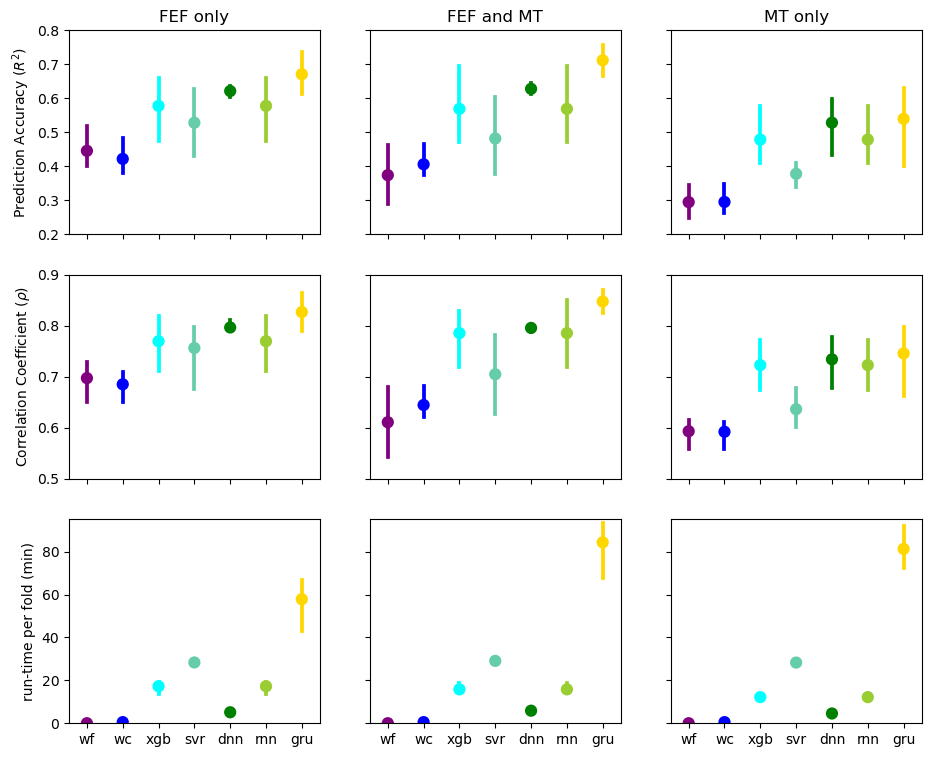

In [120]:
fig, axes = plt.subplots(3,3,figsize=(11,9)) #Create figure (11 rows by 3 columns)

m=0
c=0
a = sns.pointplot(ax=axes[m,c],data=df_r2_fef,join=False,palette=colors)
a.set(ylim=(0.2, 0.8))
a.set(ylabel='Prediction Accuracy ($R^2$)')
a.set(title='FEF only')
a.set(xticklabels=[])

m=m+1
a = sns.pointplot(ax=axes[m,c],data=df_rho_fef,join=False,palette=colors)
a.set(ylim=(0.5, 0.9))
a.set(ylabel=r'Correlation Coefficient ($\rho$)')
a.set(xticklabels=[])

m=m+1
a = sns.pointplot(ax=axes[m,c],data=(df_te_fef)/60,join=False,palette=colors)
a.set(ylim=(0, 95))
a.set(ylabel='run-time per fold (min)')

m=0
c=c+1
a = sns.pointplot(ax=axes[m,c],data=df_r2_fefmt,join=False,palette=colors)
a.set(ylim=(0.2, 0.8))
#a.set(ylabel='Prediction Accuracy ($R^2$)')
a.set(title='FEF and MT')
a.set(yticklabels=[])
a.set(xticklabels=[])

m=m+1
a = sns.pointplot(ax=axes[m,c],data=df_rho_fefmt,join=False,palette=colors)
a.set(ylim=(0.5, 0.9))
#a.set(ylabel=r'Correlation Coefficient ($\rho$)')
a.set(yticklabels=[])
a.set(xticklabels=[])

m=m+1
a = sns.pointplot(ax=axes[m,c],data=(df_te_fefmt)/60,join=False,palette=colors)
a.set(ylim=(0, 95))
#a.set(ylabel='run-time per fold (min)')
a.set(yticklabels=[])

m=0
c=c+1
a = sns.pointplot(ax=axes[m,c],data=df_r2_mt,join=False,palette=colors)
a.set(ylim=(0.2, 0.8))
#a.set(ylabel='Prediction Accuracy ($R^2$)')
a.set(title='MT only')
a.set(yticklabels=[])
a.set(xticklabels=[])

m=m+1
a = sns.pointplot(ax=axes[m,c],data=df_rho_mt,join=False,palette=colors)
a.set(ylim=(0.5, 0.9))
#a.set(ylabel=r'Correlation Coefficient ($\rho$)')
a.set(yticklabels=[])
a.set(xticklabels=[])

m=m+1
a = sns.pointplot(ax=axes[m,c],data=(df_te_mt)/60,join=False,palette=colors)
a.set(ylim=(0, 95))
#a.set(ylabel='run-time per fold (min)')
a.set(yticklabels=[])


fig.savefig(fig_folder+'model_perf.png', dpi=300)